(0, 4000.0)

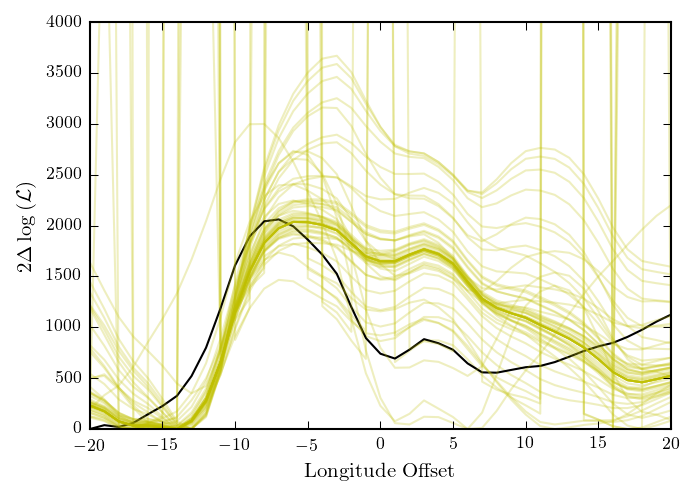

In [27]:
import h5py

best_fit = 12

for i in range(0,65):
    
    h5 = h5py.File('../mod_b_'+str(i)+'.hdf5', 'r')
#     for f in h5['/fit_results/scan_longitude/'].attrs:
#         print f
    try:    
        ll =  h5['/fit_results/scan_longitude/'].attrs['loglike_total']
        lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']

        if i == best_fit:
            plt.plot(lons,2*(ll-min(ll)), c='k', alpha=1)
        else:
            plt.plot(lons,2*(ll-min(ll)), c='y', alpha=.25)
        
        
        
    except:
        pass
    

plt.ylabel(r'$2\Delta\log{(\mathcal{L})}$')
plt.xlabel(r'Longitude Offset')
plt.ylim(0,4e3)
#plt.xlim(1,1.5)

0


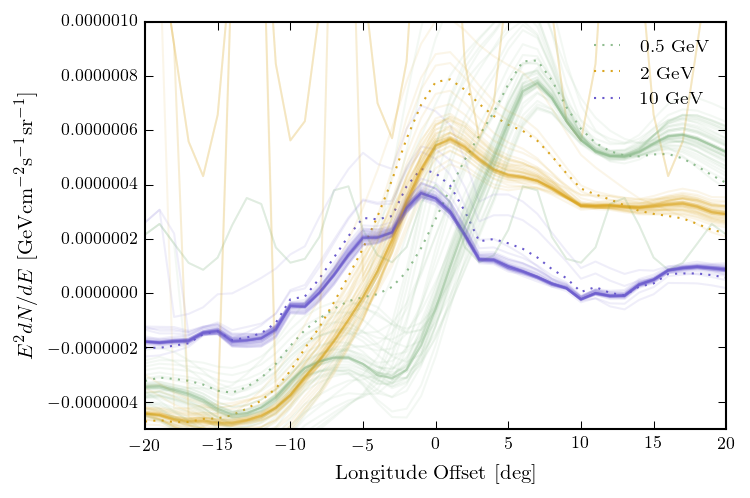

In [96]:
count = 0 
for i in range(0,65):
    try:
        h5 = h5py.File('../mod_b_'+str(i)+'.hdf5', 'r')
        energies =  h5['/fit_results/scan_longitude/'].attrs['energies']
        dm_spec =  h5['/fit_results/scan_longitude/'].attrs['dm_spec']
        lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']

        flux500 = [energies[3]**2*spec[3]/1e3 for spec in dm_spec]
        flux1000 = [energies[10]**2*spec[10]/1e3 for spec in dm_spec]
        flux2000 = [energies[13]**2*spec[13]/1e3 for spec in dm_spec]
        flux10000 = [energies[19]**2*spec[19]/1e3 for spec in dm_spec]


        if i == best_fit:
            plt.plot(lons,flux500, c='darkseagreen', alpha=1, ls=':',label='0.5 GeV')
            plt.plot(lons,flux2000, c='goldenrod', alpha=1, ls=':', label='2 GeV')
            plt.plot(lons,flux10000, c='slateblue', alpha=1, ls=':',label='10 GeV')
            
        else:
            plt.plot(lons,flux2000, c='goldenrod', alpha=.1)
            plt.plot(lons,flux500, c='darkseagreen', ls='-', alpha=.1)
            plt.plot(lons,flux10000, c='slateblue', alpha=.1, ls='-')
    except:
        pass
plt.legend(frameon=False)
plt.ylabel(r'$E^2 dN/dE$ [$\rm GeV cm^{-2} s^{-1} sr^{-1}$]')
plt.xlabel(r'Longitude Offset [deg]')
plt.ylim(-5e-7, 1e-6)
print count

0


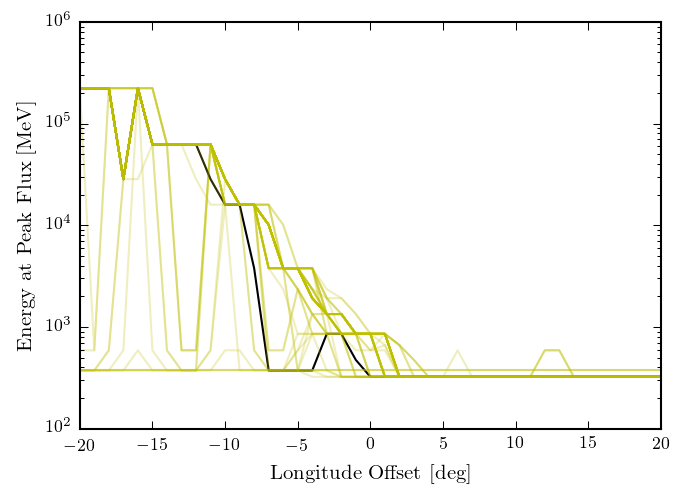

In [54]:
import h5py

best_fit = 12

count = 0 
for i in range(0,65):
    
    h5 = h5py.File('../mod_b_'+str(i)+'.hdf5', 'r')
    energies =  h5['/fit_results/scan_longitude/'].attrs['energies']
    dm_spec =  h5['/fit_results/scan_longitude/'].attrs['dm_spec']
    lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']
    peak = [energies[np.argmax(spec)] for spec in dm_spec]

    if i == best_fit:
        plt.plot(lons,peak, c='k', alpha=1)

    else:
        plt.plot(lons,peak, c='y', alpha=.25)
            

plt.ylabel(r'Energy at Peak Flux [MeV]')
plt.xlabel(r'Longitude Offset [deg]')
plt.yscale('log')
print count
#plt.ylim(0,4e3)
#plt.xlim(1,1.5)

In [68]:
print energies[19]
print energies[3]

10105.3055384
474.341649025
